<a href="https://colab.research.google.com/github/jdbj89/colab_repo/blob/main/Instaleap_test_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from re import sub
import pandas as pd
from datetime import datetime

#df = pd.read_csv('/content/drive/MyDrive/Instaleap_test/bq-results-20240402-190356-1712084675776.csv', sep=',',
#                 parse_dates=['actual_start_time_picking', 'actual_end_time_picking', 'optimal_start_time_picking', 'optimal_end_time_picking'])

df = pd.read_csv('/content/drive/MyDrive/Instaleap_test/bq-results-20240402-190356-1712084675776.csv', sep=',')
display(df.head(5))
print(len(df))

display(df.describe())

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143 UTC,2024-03-05 19:52:12.299 UTC,2024-03-05 21:03:00 UTC,2024-03-05 21:08:00 UTC
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364 UTC,2024-03-04 23:52:55.154 UTC,2024-03-04 23:28:00 UTC,2024-03-04 23:32:00 UTC
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852 UTC,2024-03-05 03:14:43.896 UTC,2024-03-04 23:29:00 UTC,2024-03-05 00:08:00 UTC
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803 UTC,2024-03-05 00:57:51.608 UTC,2024-03-05 00:42:00 UTC,2024-03-05 00:45:00 UTC
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621 UTC,2024-03-05 01:04:45.473 UTC,2024-03-05 01:04:00 UTC,2024-03-05 01:06:00 UTC


337152


,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking
count,337152,337152,313774,299744,337152,337152
unique,741,337152,254783,299663,12195,11933
top,4d1c5d32-b237-4954-bccd-72300987dceb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-14 16:55:35.798 UTC,2024-03-08 21:05:10.293 UTC,2024-03-02 17:00:00 UTC,2024-03-02 00:08:00 UTC
freq,2221,1,22,2,725,353


In [ ]:
## CHECK NULL values
print(df.isna().sum())

#nan_values = df[df.isna().any(axis=1)]
#display(nan_values)
#display(nan_values.groupby(['store_id']).count())

## DROP NUll
df.dropna(axis=0, how="any", inplace=True)
df.reset_index(drop=True, inplace=True)

print(len(df))
print(df.isnull().values.any())

display(df)
#print(df['job_id'].isnull().values.any())
#print(df.isnull().values.any())

store_id                          0
job_id                            0
actual_start_time_picking     23378
actual_end_time_picking       37408
optimal_start_time_picking        0
optimal_end_time_picking          0
dtype: int64
299744
False


,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143 UTC,2024-03-05 19:52:12.299 UTC,2024-03-05 21:03:00 UTC,2024-03-05 21:08:00 UTC
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364 UTC,2024-03-04 23:52:55.154 UTC,2024-03-04 23:28:00 UTC,2024-03-04 23:32:00 UTC
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852 UTC,2024-03-05 03:14:43.896 UTC,2024-03-04 23:29:00 UTC,2024-03-05 00:08:00 UTC
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803 UTC,2024-03-05 00:57:51.608 UTC,2024-03-05 00:42:00 UTC,2024-03-05 00:45:00 UTC
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621 UTC,2024-03-05 01:04:45.473 UTC,2024-03-05 01:04:00 UTC,2024-03-05 01:06:00 UTC
...,...,...,...,...,...,...
299739,43ccc4f4-771b-4b61-a93b-195a54eec76f,e786bb75-985d-4590-96ec-ffb540008247,2024-03-02 15:50:27.031 UTC,2024-03-02 16:21:09.532 UTC,2024-03-02 16:30:00 UTC,2024-03-02 17:12:00 UTC
299740,43ccc4f4-771b-4b61-a93b-195a54eec76f,8c0b3b2b-7d79-4813-9e9b-51d8189bfdb5,2024-03-01 23:41:00.936 UTC,2024-03-02 00:18:27.371 UTC,2024-03-01 23:20:00 UTC,2024-03-02 00:17:00 UTC
299741,43ccc4f4-771b-4b61-a93b-195a54eec76f,0bc84040-7311-4b07-8913-91c35d102b4a,2024-03-02 17:15:43.48 UTC,2024-03-02 17:42:51.704 UTC,2024-03-02 18:02:00 UTC,2024-03-02 18:17:00 UTC
299742,43ccc4f4-771b-4b61-a93b-195a54eec76f,269c6f53-e083-43bd-86fa-b1a8f1d86f40,2024-03-02 19:13:54.89 UTC,2024-03-02 20:41:01.803 UTC,2024-03-02 21:11:00 UTC,2024-03-02 21:56:00 UTC


In [ ]:
df=df.join(df['store_id'].str.split('-', expand=True).rename(columns={0:'store_A', 1:'store_B', 2:'store_C', 3: 'store_D', 4: 'store_E'}))
display(df)

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,store_A,store_B,store_C,store_D,store_E
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143 UTC,2024-03-05 19:52:12.299 UTC,2024-03-05 21:03:00 UTC,2024-03-05 21:08:00 UTC,732eec9f,fc84,4d20,86b9,fe357a0976bb
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364 UTC,2024-03-04 23:52:55.154 UTC,2024-03-04 23:28:00 UTC,2024-03-04 23:32:00 UTC,115ee3df,80e2,4c17,a5e9,29bcae08fe01
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852 UTC,2024-03-05 03:14:43.896 UTC,2024-03-04 23:29:00 UTC,2024-03-05 00:08:00 UTC,6a54da8e,9ba7,4f0a,a143,d7711eb6b5e7
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803 UTC,2024-03-05 00:57:51.608 UTC,2024-03-05 00:42:00 UTC,2024-03-05 00:45:00 UTC,ab0c60c6,1935,4f1d,a80a,25d0e9e8fbb7
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621 UTC,2024-03-05 01:04:45.473 UTC,2024-03-05 01:04:00 UTC,2024-03-05 01:06:00 UTC,3f298c0f,d807,4d26,9908,8c3f3f2b369a
...,...,...,...,...,...,...,...,...,...,...,...
299739,43ccc4f4-771b-4b61-a93b-195a54eec76f,e786bb75-985d-4590-96ec-ffb540008247,2024-03-02 15:50:27.031 UTC,2024-03-02 16:21:09.532 UTC,2024-03-02 16:30:00 UTC,2024-03-02 17:12:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f
299740,43ccc4f4-771b-4b61-a93b-195a54eec76f,8c0b3b2b-7d79-4813-9e9b-51d8189bfdb5,2024-03-01 23:41:00.936 UTC,2024-03-02 00:18:27.371 UTC,2024-03-01 23:20:00 UTC,2024-03-02 00:17:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f
299741,43ccc4f4-771b-4b61-a93b-195a54eec76f,0bc84040-7311-4b07-8913-91c35d102b4a,2024-03-02 17:15:43.48 UTC,2024-03-02 17:42:51.704 UTC,2024-03-02 18:02:00 UTC,2024-03-02 18:17:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f
299742,43ccc4f4-771b-4b61-a93b-195a54eec76f,269c6f53-e083-43bd-86fa-b1a8f1d86f40,2024-03-02 19:13:54.89 UTC,2024-03-02 20:41:01.803 UTC,2024-03-02 21:11:00 UTC,2024-03-02 21:56:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f


In [ ]:
df=df.join(df['job_id'].str.split('-', expand=True).rename(columns={0:'job_A', 1:'job_B', 2:'job_C', 3: 'job_D', 4: 'job_E'}))
display(df)

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,store_A,store_B,store_C,store_D,store_E,job_A,job_B,job_C,job_D,job_E
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143 UTC,2024-03-05 19:52:12.299 UTC,2024-03-05 21:03:00 UTC,2024-03-05 21:08:00 UTC,732eec9f,fc84,4d20,86b9,fe357a0976bb,79a83c1b,59dd,412e,af07,5fda4a5bb261
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364 UTC,2024-03-04 23:52:55.154 UTC,2024-03-04 23:28:00 UTC,2024-03-04 23:32:00 UTC,115ee3df,80e2,4c17,a5e9,29bcae08fe01,c8b6daa6,63fa,4a7a,80ec,1980b9895fd4
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852 UTC,2024-03-05 03:14:43.896 UTC,2024-03-04 23:29:00 UTC,2024-03-05 00:08:00 UTC,6a54da8e,9ba7,4f0a,a143,d7711eb6b5e7,ae98ef17,dd5d,4459,afb6,47631e6c64b9
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803 UTC,2024-03-05 00:57:51.608 UTC,2024-03-05 00:42:00 UTC,2024-03-05 00:45:00 UTC,ab0c60c6,1935,4f1d,a80a,25d0e9e8fbb7,12dcc93b,da53,48f3,abb5,b2bfd873745b
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621 UTC,2024-03-05 01:04:45.473 UTC,2024-03-05 01:04:00 UTC,2024-03-05 01:06:00 UTC,3f298c0f,d807,4d26,9908,8c3f3f2b369a,efae594a,3fdf,4e13,a71c,a53c7185888f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299739,43ccc4f4-771b-4b61-a93b-195a54eec76f,e786bb75-985d-4590-96ec-ffb540008247,2024-03-02 15:50:27.031 UTC,2024-03-02 16:21:09.532 UTC,2024-03-02 16:30:00 UTC,2024-03-02 17:12:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f,e786bb75,985d,4590,96ec,ffb540008247
299740,43ccc4f4-771b-4b61-a93b-195a54eec76f,8c0b3b2b-7d79-4813-9e9b-51d8189bfdb5,2024-03-01 23:41:00.936 UTC,2024-03-02 00:18:27.371 UTC,2024-03-01 23:20:00 UTC,2024-03-02 00:17:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f,8c0b3b2b,7d79,4813,9e9b,51d8189bfdb5
299741,43ccc4f4-771b-4b61-a93b-195a54eec76f,0bc84040-7311-4b07-8913-91c35d102b4a,2024-03-02 17:15:43.48 UTC,2024-03-02 17:42:51.704 UTC,2024-03-02 18:02:00 UTC,2024-03-02 18:17:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f,0bc84040,7311,4b07,8913,91c35d102b4a
299742,43ccc4f4-771b-4b61-a93b-195a54eec76f,269c6f53-e083-43bd-86fa-b1a8f1d86f40,2024-03-02 19:13:54.89 UTC,2024-03-02 20:41:01.803 UTC,2024-03-02 21:11:00 UTC,2024-03-02 21:56:00 UTC,43ccc4f4,771b,4b61,a93b,195a54eec76f,269c6f53,e083,43bd,86fa,b1a8f1d86f40


In [ ]:
## PARSING DATES

def try_parsing_date(text):
    for fmt in ('%Y-%m-%d %H:%M:%S.%f %Z', '%Y-%m-%d %H:%M:%S %Z'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

### Parsing dates
df['actual_start_time_picking']=df['actual_start_time_picking'].apply(lambda x: try_parsing_date(x))
df['actual_end_time_picking']=df['actual_end_time_picking'].apply(lambda x: try_parsing_date(x))
df['optimal_start_time_picking']=df['optimal_start_time_picking'].apply(lambda x: try_parsing_date(x))
df['optimal_end_time_picking']=df['optimal_end_time_picking'].apply(lambda x: try_parsing_date(x))

display(df)

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,store_A,store_B,store_C,store_D,store_E,job_A,job_B,job_C,job_D,job_E
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143,2024-03-05 19:52:12.299,2024-03-05 21:03:00,2024-03-05 21:08:00,732eec9f,fc84,4d20,86b9,fe357a0976bb,79a83c1b,59dd,412e,af07,5fda4a5bb261
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364,2024-03-04 23:52:55.154,2024-03-04 23:28:00,2024-03-04 23:32:00,115ee3df,80e2,4c17,a5e9,29bcae08fe01,c8b6daa6,63fa,4a7a,80ec,1980b9895fd4
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852,2024-03-05 03:14:43.896,2024-03-04 23:29:00,2024-03-05 00:08:00,6a54da8e,9ba7,4f0a,a143,d7711eb6b5e7,ae98ef17,dd5d,4459,afb6,47631e6c64b9
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803,2024-03-05 00:57:51.608,2024-03-05 00:42:00,2024-03-05 00:45:00,ab0c60c6,1935,4f1d,a80a,25d0e9e8fbb7,12dcc93b,da53,48f3,abb5,b2bfd873745b
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621,2024-03-05 01:04:45.473,2024-03-05 01:04:00,2024-03-05 01:06:00,3f298c0f,d807,4d26,9908,8c3f3f2b369a,efae594a,3fdf,4e13,a71c,a53c7185888f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299739,43ccc4f4-771b-4b61-a93b-195a54eec76f,e786bb75-985d-4590-96ec-ffb540008247,2024-03-02 15:50:27.031,2024-03-02 16:21:09.532,2024-03-02 16:30:00,2024-03-02 17:12:00,43ccc4f4,771b,4b61,a93b,195a54eec76f,e786bb75,985d,4590,96ec,ffb540008247
299740,43ccc4f4-771b-4b61-a93b-195a54eec76f,8c0b3b2b-7d79-4813-9e9b-51d8189bfdb5,2024-03-01 23:41:00.936,2024-03-02 00:18:27.371,2024-03-01 23:20:00,2024-03-02 00:17:00,43ccc4f4,771b,4b61,a93b,195a54eec76f,8c0b3b2b,7d79,4813,9e9b,51d8189bfdb5
299741,43ccc4f4-771b-4b61-a93b-195a54eec76f,0bc84040-7311-4b07-8913-91c35d102b4a,2024-03-02 17:15:43.480,2024-03-02 17:42:51.704,2024-03-02 18:02:00,2024-03-02 18:17:00,43ccc4f4,771b,4b61,a93b,195a54eec76f,0bc84040,7311,4b07,8913,91c35d102b4a
299742,43ccc4f4-771b-4b61-a93b-195a54eec76f,269c6f53-e083-43bd-86fa-b1a8f1d86f40,2024-03-02 19:13:54.890,2024-03-02 20:41:01.803,2024-03-02 21:11:00,2024-03-02 21:56:00,43ccc4f4,771b,4b61,a93b,195a54eec76f,269c6f53,e083,43bd,86fa,b1a8f1d86f40


In [ ]:
##GENERATE NEW FEATURES

### Time intervals
df['optimal_elapsed_time']=df['optimal_end_time_picking']-df['optimal_start_time_picking']
df['optimal_elapsed_time']=df['optimal_elapsed_time'].map(lambda x: x.total_seconds()/60) #value in minutes

df['actual_elapsed_time']=df['actual_end_time_picking']-df['actual_start_time_picking']
df['actual_elapsed_time']=df['actual_elapsed_time'].map(lambda x: x.total_seconds()/60) #value in minutes


## Delays
df['starting_delay']=df['actual_start_time_picking']-df['optimal_start_time_picking']
df['starting_delay']=df['starting_delay'].map(lambda x: x.total_seconds()/60)

df['delivery_delay']=df['actual_end_time_picking']-df['optimal_end_time_picking']
df['delivery_delay']=df['delivery_delay'].map(lambda x: x.total_seconds()/60)

df['elapsed_time_delay']=df['actual_elapsed_time']-df['optimal_elapsed_time']


## Date Optimal
df['o_date']=df['optimal_start_time_picking'].map(lambda x: x.date())
df['o_year']=df['optimal_start_time_picking'].map(lambda x: x.year)
df['o_month']=df['optimal_start_time_picking'].map(lambda x: x.month)
df['o_day']=df['optimal_start_time_picking'].map(lambda x: x.day)

df['o_week']=df['optimal_start_time_picking'].map(lambda x: x.week)
df['o_weekday']=df['optimal_start_time_picking'].map(lambda x: x.weekday())

df['o_hour']=df['optimal_start_time_picking'].map(lambda x: x.hour)
df['o_minute']=df['optimal_start_time_picking'].map(lambda x: x.minute)

## Date Actual
df['a_date']=df['actual_start_time_picking'].map(lambda x: x.date())
df['a_year']=df['actual_start_time_picking'].map(lambda x: x.year)
df['a_month']=df['actual_start_time_picking'].map(lambda x: x.month)
df['a_day']=df['actual_start_time_picking'].map(lambda x: x.day)

df['a_week']=df['actual_start_time_picking'].map(lambda x: x.week)
df['a_weekday']=df['actual_start_time_picking'].map(lambda x: x.weekday())

df['a_hour']=df['actual_start_time_picking'].map(lambda x: x.hour)
df['a_minute']=df['actual_start_time_picking'].map(lambda x: x.minute)



## weekdays
#weekDaysMapping = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")


display(df.head(5))
print(len(df))
display(df.describe())

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,store_A,store_B,store_C,store_D,...,o_hour,o_minute,a_date,a_year,a_month,a_day,a_week,a_weekday,a_hour,a_minute
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143,2024-03-05 19:52:12.299,2024-03-05 21:03:00,2024-03-05 21:08:00,732eec9f,fc84,4d20,86b9,...,21,3,2024-03-05,2024,3,5,10,1,19,51
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364,2024-03-04 23:52:55.154,2024-03-04 23:28:00,2024-03-04 23:32:00,115ee3df,80e2,4c17,a5e9,...,23,28,2024-03-04,2024,3,4,10,0,23,28
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852,2024-03-05 03:14:43.896,2024-03-04 23:29:00,2024-03-05 00:08:00,6a54da8e,9ba7,4f0a,a143,...,23,29,2024-03-04,2024,3,4,10,0,23,24
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803,2024-03-05 00:57:51.608,2024-03-05 00:42:00,2024-03-05 00:45:00,ab0c60c6,1935,4f1d,a80a,...,0,42,2024-03-05,2024,3,5,10,1,0,37
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621,2024-03-05 01:04:45.473,2024-03-05 01:04:00,2024-03-05 01:06:00,3f298c0f,d807,4d26,9908,...,1,4,2024-03-05,2024,3,5,10,1,0,59


299744


,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,optimal_elapsed_time,actual_elapsed_time,starting_delay,delivery_delay,elapsed_time_delay,o_year,...,o_weekday,o_hour,o_minute,a_year,a_month,a_day,a_week,a_weekday,a_hour,a_minute
count,299744,299744,299744,299744,299744.000000,299744.000000,299744.000000,299744.000000,299744.000000,299744.0,...,299744.000000,299744.000000,299744.000000,299744.0,299744.000000,299744.000000,299744.000000,299744.000000,299744.000000,299744.000000
mean,2024-03-07 15:50:18.034274304,2024-03-07 16:35:16.127457280,2024-03-07 16:46:42.501467648,2024-03-07 17:13:04.633353728,26.368865,44.968220,-56.407787,-37.808432,18.599355,2024.0,...,3.143566,16.831126,27.322815,2024.0,2.985668,7.350853,9.970238,3.143552,16.907017,28.742357
min,2024-02-27 21:39:03.277000,2024-02-27 21:45:36.129000,2024-02-28 01:03:00,2024-02-28 01:05:00,1.000000,0.086083,-10366.272000,-10365.267800,-311.211317,2024.0,...,0.000000,0.000000,0.000000,2024.0,2.000000,1.000000,9.000000,0.000000,0.000000,0.000000
25%,2024-03-03 21:07:13.659999744,2024-03-03 21:53:22.634249984,2024-03-03 21:42:00,2024-03-03 22:12:00,6.000000,12.547779,-25.434033,-23.006371,-3.429637,2024.0,...,1.000000,15.000000,11.000000,2024.0,3.000000,3.000000,9.000000,1.000000,15.000000,14.000000
50%,2024-03-07 17:14:25.837499904,2024-03-07 17:56:53.004000,2024-03-07 17:51:00,2024-03-07 18:14:00,18.000000,29.160725,-3.919825,2.124983,5.269625,2024.0,...,3.000000,18.000000,27.000000,2024.0,3.000000,7.000000,10.000000,3.000000,18.000000,28.000000
75%,2024-03-10 21:49:33.736999936,2024-03-10 22:32:17.388000,2024-03-10 22:26:00,2024-03-10 22:57:00,38.000000,54.904633,2.073983,24.968392,25.077104,2024.0,...,5.000000,21.000000,43.000000,2024.0,3.000000,11.000000,10.000000,5.000000,20.000000,44.000000
max,2024-03-20 21:16:59.355000,2024-03-20 23:35:47.441000,2024-03-21 00:28:00,2024-03-21 01:08:00,443.000000,7284.026250,1619.102550,3078.239750,7262.026250,2024.0,...,6.000000,23.000000,59.000000,2024.0,3.000000,29.000000,12.000000,6.000000,23.000000,59.000000
std,NaN,NaN,NaN,NaN,26.414577,92.031064,268.726586,252.192014,90.322156,0.0,...,2.030120,5.783753,18.248332,0.0,0.118856,4.746934,0.710749,2.028515,5.330758,17.443488


In [ ]:
df_new = df.copy()
len(df_new)

299744

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def get_outliers (column):
  idx=[]
  q1 = np.percentile(column, 25)
  q3 = np.percentile(column, 75)
  iqr = q3-q1
  lower = q1 - (3.0*iqr)  ## 1.5 common outliers, 3 times (major outliers)
  upper = q3 + (3.0*iqr)

  num_outliers=sum((column<lower) | (column>upper))
  total = len(column)
  upper_list = column[column>=upper].index.tolist()
  if len(upper_list)>0:
    idx+=upper_list
  lower_list = column[column<=lower].index.tolist()
  if len(lower_list)>0:
    idx+=lower_list

  #print(idx)
  #print(f"num_outliers = {num_outliers}, percentage= {num_outliers/total}")
  #return q1, q3, lower,upper,num_outliers, num_outliers/total
  return lower, upper, idx


<Axes: >

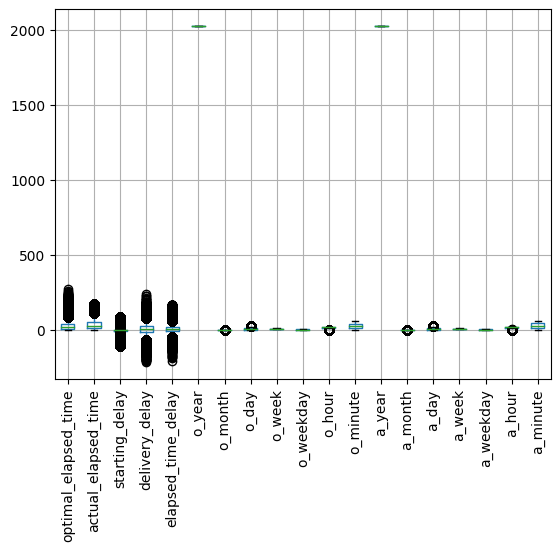

In [ ]:


#df_outlier = df_new['starting_delay']
#lower,upper,idx = get_outliers(df_outlier)

#df_new.drop(index=idx, inplace=True)

df_outlier = df_new['actual_elapsed_time']
lower,upper,idx = get_outliers(df_outlier)

df_new.drop(index=idx, inplace=True)

df_new.boxplot(rot=90)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

indexes=[]
val=0
cols = ['actual_elapsed_time', 'starting_delay']
stores = df_new.store_id.unique()

for store in stores:
  df_outlier = df_new['actual_elapsed_time'].loc[df_new['store_id']==store]
  lower,upper,idx = get_outliers(df_outlier)
  indexes+=idx

  print(val)
  val+=1

df_new.drop(index=indexes, inplace=True)
print(f'new size= {len(df_new)}')


indexes=[]
val=0
stores = df_new.store_id.unique()
for store in stores:
  df_outlier = df_new['starting_delay'].loc[df_new['store_id']==store]
  lower,upper,idx = get_outliers(df_outlier)
  indexes+=idx

  print(val)
  val+=1

df_new.drop(index=indexes, inplace=True)
print(f'new size= {len(df_new)}')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

268384
268384


<Axes: >

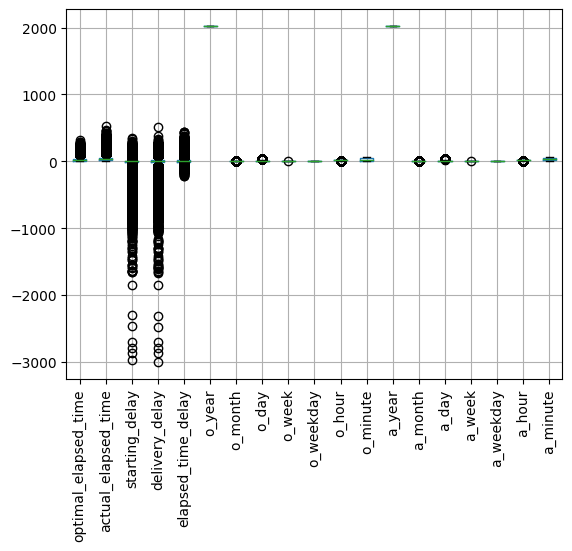

In [ ]:
## Discard stores with few data
print(len(df_new))
#df_new2 = df_new.groupby(['store_id']).filter(lambda x: x['job_id'].count()>=500)  ## OJO se puede excluir esto y mejor ser mas estrictos con el IQR (no funciono muy bien)

df_new2 = df_new.copy()
df_new2.reset_index(drop=True, inplace=True)
print(len(df_new2))

df_new2.boxplot(rot=90)

In [ ]:
df_new3 = df_new2.copy()
print(len(df_new3))

268384


In [ ]:
## Tranform stores to numerical value
df_new3['store_num'] = df_new3['store_id'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['store_numA'] = df_new3['store_A'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['store_numB'] = df_new3['store_B'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['store_numC'] = df_new3['store_C'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['store_numD'] = df_new3['store_D'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['store_numE'] = df_new3['store_E'].factorize()[0]  # otorga un valor para cada tipo de dato --JD

df_new3['job_num'] = df_new3['job_id'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['job_numA'] = df_new3['job_A'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['job_numB'] = df_new3['job_B'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['job_numC'] = df_new3['job_C'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['job_numD'] = df_new3['job_D'].factorize()[0]  # otorga un valor para cada tipo de dato --JD
df_new3['job_numE'] = df_new3['job_E'].factorize()[0]  # otorga un valor para cada tipo de dato --JD

'''store_id_df = df_new3[['store_id', 'store_num']].drop_duplicates().sort_values('store_num')
store_to_id = dict(store_id_df.values)
id_to_store = dict(store_id_df[['store_num', 'store_id']].values)

print(store_id_df)
print(store_to_id)
print(id_to_store)

df_new3.info()
df_new3.dtypes'''

display(df_new3.head(5))

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,store_A,store_B,store_C,store_D,...,store_numB,store_numC,store_numD,store_numE,job_num,job_numA,job_numB,job_numC,job_numD,job_numE
0,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364,2024-03-04 23:52:55.154,2024-03-04 23:28:00,2024-03-04 23:32:00,115ee3df,80e2,4c17,a5e9,...,0,0,0,0,0,0,0,0,0,0
1,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852,2024-03-05 03:14:43.896,2024-03-04 23:29:00,2024-03-05 00:08:00,6a54da8e,9ba7,4f0a,a143,...,1,1,1,1,1,1,1,1,1,1
2,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803,2024-03-05 00:57:51.608,2024-03-05 00:42:00,2024-03-05 00:45:00,ab0c60c6,1935,4f1d,a80a,...,2,2,2,2,2,2,2,2,2,2
3,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621,2024-03-05 01:04:45.473,2024-03-05 01:04:00,2024-03-05 01:06:00,3f298c0f,d807,4d26,9908,...,3,3,3,3,3,3,3,3,3,3
4,b37369cc-9a55-4d73-9f62-a15892b4e3a1,a6b9da9d-b793-4b6f-9291-d3c1f03275e5,2024-03-05 21:24:47.037,2024-03-05 21:27:00.797,2024-03-06 01:17:00,2024-03-06 01:21:00,b37369cc,9a55,4d73,9f62,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
df_prueba = df_new3.loc[df_new3['store_num']==1].sort_values(by=['optimal_start_time_picking'], ascending=True)


df_prueba['row_num'] = df_prueba.sort_values(['optimal_start_time_picking'], ascending=True).groupby(['store_num']).cumcount() + 1

display(df_prueba)

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,optimal_elapsed_time,actual_elapsed_time,starting_delay,delivery_delay,...,a_date,a_year,a_month,a_day,a_week,a_weekday,a_hour,a_minute,store_num,row_num
106322,115ee3df-80e2-4c17-a5e9-29bcae08fe01,b754781b-fbfe-4e0a-81f7-37d3ddb95815,2024-02-29 23:40:13.947,2024-02-29 23:42:30.293,2024-02-29 23:40:00,2024-02-29 23:42:00,2.0,2.272433,0.232450,0.504883,...,2024-02-29,2024,2,29,9,3,23,40,1,1
116196,115ee3df-80e2-4c17-a5e9-29bcae08fe01,5318cbc1-9c4c-4a6d-9388-245d92a8e34a,2024-03-01 17:12:05.676,2024-03-01 17:39:04.997,2024-03-01 17:12:00,2024-03-01 17:50:00,38.0,26.988683,0.094600,-10.916717,...,2024-03-01,2024,3,1,9,4,17,12,1,2
124685,115ee3df-80e2-4c17-a5e9-29bcae08fe01,42183d97-394d-473f-aac2-460922a8d69d,2024-03-01 19:08:36.295,2024-03-01 20:19:33.307,2024-03-01 19:13:00,2024-03-01 20:13:00,60.0,70.950200,-4.395083,6.555117,...,2024-03-01,2024,3,1,9,4,19,8,1,3
123111,115ee3df-80e2-4c17-a5e9-29bcae08fe01,fcc12b67-d559-4186-9346-54d0453f55fd,2024-03-01 19:46:04.692,2024-03-01 20:10:42.500,2024-03-01 19:51:00,2024-03-01 20:09:00,18.0,24.630133,-4.921800,1.708333,...,2024-03-01,2024,3,1,9,4,19,46,1,4
112557,115ee3df-80e2-4c17-a5e9-29bcae08fe01,a01d33f4-a050-4caf-93b4-e6708dc7a566,2024-03-01 19:53:36.892,2024-03-01 20:09:01.044,2024-03-01 19:52:00,2024-03-01 19:54:00,2.0,15.402533,1.614867,15.017400,...,2024-03-01,2024,3,1,9,4,19,53,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85351,115ee3df-80e2-4c17-a5e9-29bcae08fe01,22fc98b7-f2e3-433a-8451-03cb0cb2b624,2024-03-14 13:05:33.272,2024-03-14 13:23:17.394,2024-03-14 13:08:00,2024-03-14 13:26:00,18.0,17.735367,-2.445467,-2.710100,...,2024-03-14,2024,3,14,11,3,13,5,1,120
85350,115ee3df-80e2-4c17-a5e9-29bcae08fe01,29c38321-6889-4527-bcb7-1f3a89086da7,2024-03-14 15:16:04.444,2024-03-14 16:09:42.222,2024-03-14 15:15:00,2024-03-14 15:41:00,26.0,53.629633,1.074067,28.703700,...,2024-03-14,2024,3,14,11,3,15,16,1,121
71795,115ee3df-80e2-4c17-a5e9-29bcae08fe01,658d4b75-1223-4394-80f3-7d9c5801f966,2024-03-14 17:29:33.881,2024-03-14 17:45:54.981,2024-03-14 17:34:00,2024-03-14 18:08:00,34.0,16.351667,-4.435317,-22.083650,...,2024-03-14,2024,3,14,11,3,17,29,1,122
85352,115ee3df-80e2-4c17-a5e9-29bcae08fe01,6bd15b44-055e-4891-a81b-f9c61ac7e5ef,2024-03-14 18:15:34.920,2024-03-14 18:49:40.749,2024-03-14 18:20:00,2024-03-14 18:48:00,28.0,34.097150,-4.418000,1.679150,...,2024-03-14,2024,3,14,11,3,18,15,1,123


In [ ]:
df_new3['order_num_store'] = df_new3.sort_values(['optimal_start_time_picking'], ascending=True).groupby(['store_num']).cumcount() + 1
df_new3['order_num_store_day'] = df_new3.sort_values(['optimal_start_time_picking'], ascending=True).groupby(['store_num', 'o_day']).cumcount() + 1
df_new3['order_num_store_hour'] = df_new3.sort_values(['optimal_start_time_picking'], ascending=True).groupby(['store_num', 'o_hour']).cumcount() + 1

df_new3['orders_date_actual'] = df_new3.groupby(['store_num', 'a_date'])['job_id'].transform('count')
df_new3['orders_date_optimal'] = df_new3.groupby(['store_num', 'o_date'])['job_id'].transform('count')
df_new3['orders_hour_actual'] = df_new3.groupby(['store_num', 'a_date', 'a_hour'])['job_id'].transform('count')
df_new3['orders_hour_optimal'] = df_new3.groupby(['store_num', 'o_date', 'o_hour'])['job_id'].transform('count')
df_new3['store_orders_total'] = df_new3.groupby(['store_num'])['job_id'].transform('count')

df_new3['start_delay_store_mean'] = df_new3.groupby(['store_num'])['starting_delay'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['start_delay_store_total'] = df_new3.groupby(['store_num'])['starting_delay'].transform('sum') #minutos totales de retraso en starting  total (viable - se puede reducir a los ultimos x dias) (**)
df_new3['start_delay_actual_date_mean'] = df_new3.groupby(['store_num', 'a_date'])['starting_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia  (viable - se puede reducir a los ultimos x dias) (**)
df_new3['start_delay_optimal_date_mean'] = df_new3.groupby(['store_num', 'o_date'])['starting_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['start_delay_date_total'] = df_new3.groupby(['store_num', 'date'])['starting_delay'].transform('sum') #minutos totales de retraso en starting para ese dia (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**)

df_new3['start_delay_actual_weekday_mean'] = df_new3.groupby(['store_num', 'a_weekday'])['starting_delay'].transform('mean')
df_new3['start_delay_optimal_weekday_mean'] = df_new3.groupby(['store_num', 'o_weekday'])['starting_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia de la semana  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['start_delay_weekday_total'] = df_new3.groupby(['store_num', 'weekday'])['starting_delay'].transform('sum') #minutos totales de retraso en starting  para ese dia de la semana (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**

df_new3['start_delay_actual_hour_mean'] = df_new3.groupby(['store_num', 'a_hour'])['starting_delay'].transform('mean')
df_new3['start_delay_optimal_hour_mean'] = df_new3.groupby(['store_num', 'o_hour'])['starting_delay'].transform('mean') #minutos promedio de retraso en starting para esa hora del dia  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['start_delay_hour_total'] = df_new3.groupby(['store_num', 'hour'])['starting_delay'].transform('sum') #minutos totales de retraso en starting para esa hora del dia (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**

df_new3['delivery_delay_store_mean'] = df_new3.groupby(['store_num'])['delivery_delay'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['delivery_delay_store_total'] = df_new3.groupby(['store_num'])['delivery_delay'].transform('sum') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
df_new3['delivery_delay_actual_date_mean'] = df_new3.groupby(['store_num', 'a_date'])['delivery_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia  (viable - se puede reducir a los ultimos x dias) (**)
df_new3['delivery_delay_optimal_date_mean'] = df_new3.groupby(['store_num', 'o_date'])['delivery_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['delivery_delay_date_total'] = df_new3.groupby(['store_num', 'date'])['delivery_delay'].transform('sum') #minutos totales de retraso en starting para ese dia (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**)

df_new3['delivery_delay_actual_weekday_mean'] = df_new3.groupby(['store_num', 'a_weekday'])['delivery_delay'].transform('mean')
df_new3['delivery_delay_optimal_weekday_mean'] = df_new3.groupby(['store_num', 'o_weekday'])['delivery_delay'].transform('mean') #minutos promedio de retraso en starting para ese dia de la semana  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['delivery_delay_weekday_total'] = df_new3.groupby(['store_num', 'weekday'])['delivery_delay'].transform('sum') #minutos totales de retraso en starting  para ese dia de la semana (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**

df_new3['delivery_delay_actual_hour_mean'] = df_new3.groupby(['store_num', 'a_hour'])['delivery_delay'].transform('mean')
df_new3['delivery_delay_optimal_hour_mean'] = df_new3.groupby(['store_num', 'o_hour'])['delivery_delay'].transform('mean') #minutos promedio de retraso en starting para esa hora del dia  (viable - se puede reducir a los ultimos x dias) (**)
#df_new3['delivery_delay_hour_total'] = df_new3.groupby(['store_num', 'hour'])['delivery_delay'].transform('sum') #minutos totales de retraso en starting para esa hora del dia (viable - se puede alimentar con el promedio de minutos totales de los ultimos x dias) (**

df_new3['total_orders_late_start'] = df_new3.groupby(['store_num'])['starting_delay'].transform(lambda x: (x[x>0].count()))
df_new3['total_orders_early_start'] = df_new3.groupby(['store_num'])['starting_delay'].transform(lambda x: (x[x<=0].count()))
df_new3['total_orders_late_delivery'] = df_new3.groupby(['store_num'])['delivery_delay'].transform(lambda x: (x[x>0].count()))
df_new3['total_orders_early_delivery'] = df_new3.groupby(['store_num'])['delivery_delay'].transform(lambda x: (x[x<=0].count()))

df_new3['optimal_elapsed_time_store_mean'] = df_new3.groupby(['store_num'])['optimal_elapsed_time'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
df_new3['actual_elapsed_time_store_mean'] = df_new3.groupby(['store_num'])['actual_elapsed_time'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)

In [ ]:
df_new3['actual_elapsed_time_date_mean'] = df_new3.groupby(['store_num','o_date'])['actual_elapsed_time'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
df_new3['actual_elapsed_time_weekday_mean'] = df_new3.groupby(['store_num', 'o_weekday'])['actual_elapsed_time'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)
df_new3['actual_elapsed_time_hour_mean'] = df_new3.groupby(['store_num','o_hour'])['actual_elapsed_time'].transform('mean') #minutos promedio de retraso en starting promedio total (viable - se puede reducir a los ultimos x dias) (**)

In [ ]:
df_final = df_new3[['order_num_store', 'order_num_store_day', 'order_num_store_hour',
                    'store_num', 'store_numA', 'store_numB', 'store_numC', 'store_numD', 'store_numE',
                    'job_num', 'job_numA', 'job_numB', 'job_numC', 'job_numD', 'job_numE',
                    'o_year', 'o_month', 'o_week', 'o_day', 'o_weekday', 'o_hour', 'o_minute',
                    'store_orders_total',
                    'start_delay_store_mean', 'start_delay_optimal_date_mean',
                    'start_delay_optimal_weekday_mean', 'start_delay_optimal_hour_mean',
                    'delivery_delay_store_mean', 'delivery_delay_optimal_date_mean', 'delivery_delay_optimal_weekday_mean', 'delivery_delay_optimal_hour_mean',
                    'total_orders_late_start', 'total_orders_early_start', 'total_orders_late_delivery', 'total_orders_early_delivery',
                    'optimal_elapsed_time_store_mean',
                    'optimal_elapsed_time', 'actual_elapsed_time_date_mean',
                    'actual_elapsed_time_weekday_mean', 'actual_elapsed_time_hour_mean',
                    'starting_delay', 'delivery_delay']]


'''df_final = df_new3[['order_num_store', 'order_num_store_day', 'order_num_store_hour',
                    'store_num', 'a_hour', 'o_hour', 'store_orders_total',
                    'delivery_delay_store_mean', 'delivery_delay_optimal_hour_mean',
                    'total_orders_early_start', 'actual_elapsed_time','optimal_elapsed_time',
                    'starting_delay', 'delivery_delay']]'''


'''df_final = df_new3[['store_num', 'a_year', 'a_month', 'a_week', 'a_day', 'a_weekday', 'a_hour', 'a_minute',
                    'o_year', 'o_month', 'o_week', 'o_day', 'o_weekday', 'o_hour', 'o_minute',
                    'order_num_store', 'order_num_store_day', 'order_num_store_hour',
                    'orders_date_actual', 'orders_date_optimal', 'orders_hour_actual', 'orders_hour_optimal', 'store_orders_total',
                    'start_delay_store_mean', 'start_delay_actual_date_mean', 'start_delay_optimal_date_mean',
                    'start_delay_actual_weekday_mean', 'start_delay_optimal_weekday_mean', 'start_delay_actual_hour_mean', 'start_delay_optimal_hour_mean',
                    'delivery_delay_store_mean', 'delivery_delay_actual_date_mean', 'delivery_delay_optimal_date_mean',
                    'delivery_delay_actual_weekday_mean', 'delivery_delay_optimal_weekday_mean', 'delivery_delay_actual_hour_mean', 'delivery_delay_optimal_hour_mean',
                    'total_orders_late_start', 'total_orders_early_start', 'total_orders_late_delivery', 'total_orders_early_delivery',
                    'actual_elapsed_time_store_mean', 'optimal_elapsed_time_store_mean',
                    'actual_elapsed_time','optimal_elapsed_time', 'starting_delay', 'delivery_delay']]'''

display(df_final.head(5))
print(df_final.dtypes)

display(df_final.describe())

,order_num_store,order_num_store_day,order_num_store_hour,store_num,store_numA,store_numB,store_numC,store_numD,store_numE,job_num,...,total_orders_early_start,total_orders_late_delivery,total_orders_early_delivery,optimal_elapsed_time_store_mean,optimal_elapsed_time,actual_elapsed_time_date_mean,actual_elapsed_time_weekday_mean,actual_elapsed_time_hour_mean,starting_delay,delivery_delay
0,41,9,5,0,0,0,0,0,0,0,...,58,80,43,17.853659,4.0,20.279185,22.461987,29.723979,0.006067,20.919233
1,182,50,21,1,1,1,1,1,1,1,...,332,393,108,38.910180,39.0,68.331330,76.617176,63.951779,-4.419133,186.731600
2,246,2,10,2,2,2,2,2,2,2,...,555,386,436,21.512165,3.0,32.442174,33.178344,16.608601,-4.919950,12.860133
3,117,11,5,3,3,3,3,3,3,3,...,132,159,154,7.124601,2.0,7.393600,8.406599,9.094903,-4.322983,-1.242117
4,88,3,2,4,4,4,4,4,4,4,...,130,103,105,20.538462,4.0,32.963978,40.933472,7.122728,-232.216050,-233.986717


order_num_store                          int64
order_num_store_day                      int64
order_num_store_hour                     int64
store_num                                int64
store_numA                               int64
store_numB                               int64
store_numC                               int64
store_numD                               int64
store_numE                               int64
job_num                                  int64
job_numA                                 int64
job_numB                                 int64
job_numC                                 int64
job_numD                                 int64
job_numE                                 int64
o_year                                   int64
o_month                                  int64
o_week                                   int64
o_day                                    int64
o_weekday                                int64
o_hour                                   int64
o_minute     

,order_num_store,order_num_store_day,order_num_store_hour,store_num,store_numA,store_numB,store_numC,store_numD,store_numE,job_num,...,total_orders_early_start,total_orders_late_delivery,total_orders_early_delivery,optimal_elapsed_time_store_mean,optimal_elapsed_time,actual_elapsed_time_date_mean,actual_elapsed_time_weekday_mean,actual_elapsed_time_hour_mean,starting_delay,delivery_delay
count,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,...,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000,268384.000000
mean,275.656567,20.769953,25.711719,300.879445,300.879445,299.658951,277.724592,293.547931,300.879445,134191.500000,...,288.873774,306.196066,244.117067,26.574147,26.574147,39.066589,39.066589,39.066589,-14.574301,-2.081860
std,239.575053,18.371784,24.249100,190.432200,190.432200,189.509093,178.701499,187.072949,190.432200,77475.931661,...,189.405104,187.424415,177.021027,8.331636,25.881937,19.051969,17.666359,18.864803,65.204930,66.425603
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,0.164833,1.207007,0.276733,-2974.370267,-3000.939700
25%,99.000000,7.000000,8.000000,136.000000,136.000000,135.000000,122.000000,131.000000,136.000000,67095.750000,...,155.000000,178.000000,108.000000,20.855263,6.000000,26.543018,27.665520,26.928268,-8.068233,-14.226237
50%,215.000000,16.000000,19.000000,288.000000,288.000000,286.000000,259.000000,280.000000,288.000000,134191.500000,...,252.000000,274.000000,192.000000,26.855288,20.000000,35.996110,36.530732,36.403301,-0.440642,3.888333
75%,384.000000,29.000000,35.000000,451.000000,451.000000,449.000000,419.000000,441.000000,451.000000,201287.250000,...,381.000000,391.000000,344.000000,32.721719,38.000000,47.551246,47.021076,47.986305,2.470267,25.854662
max,1817.000000,153.000000,222.000000,739.000000,739.000000,736.000000,688.000000,723.000000,739.000000,268383.000000,...,1242.000000,1205.000000,862.000000,51.052500,323.000000,304.684867,208.548197,244.895785,346.491983,508.899717


<Axes: >

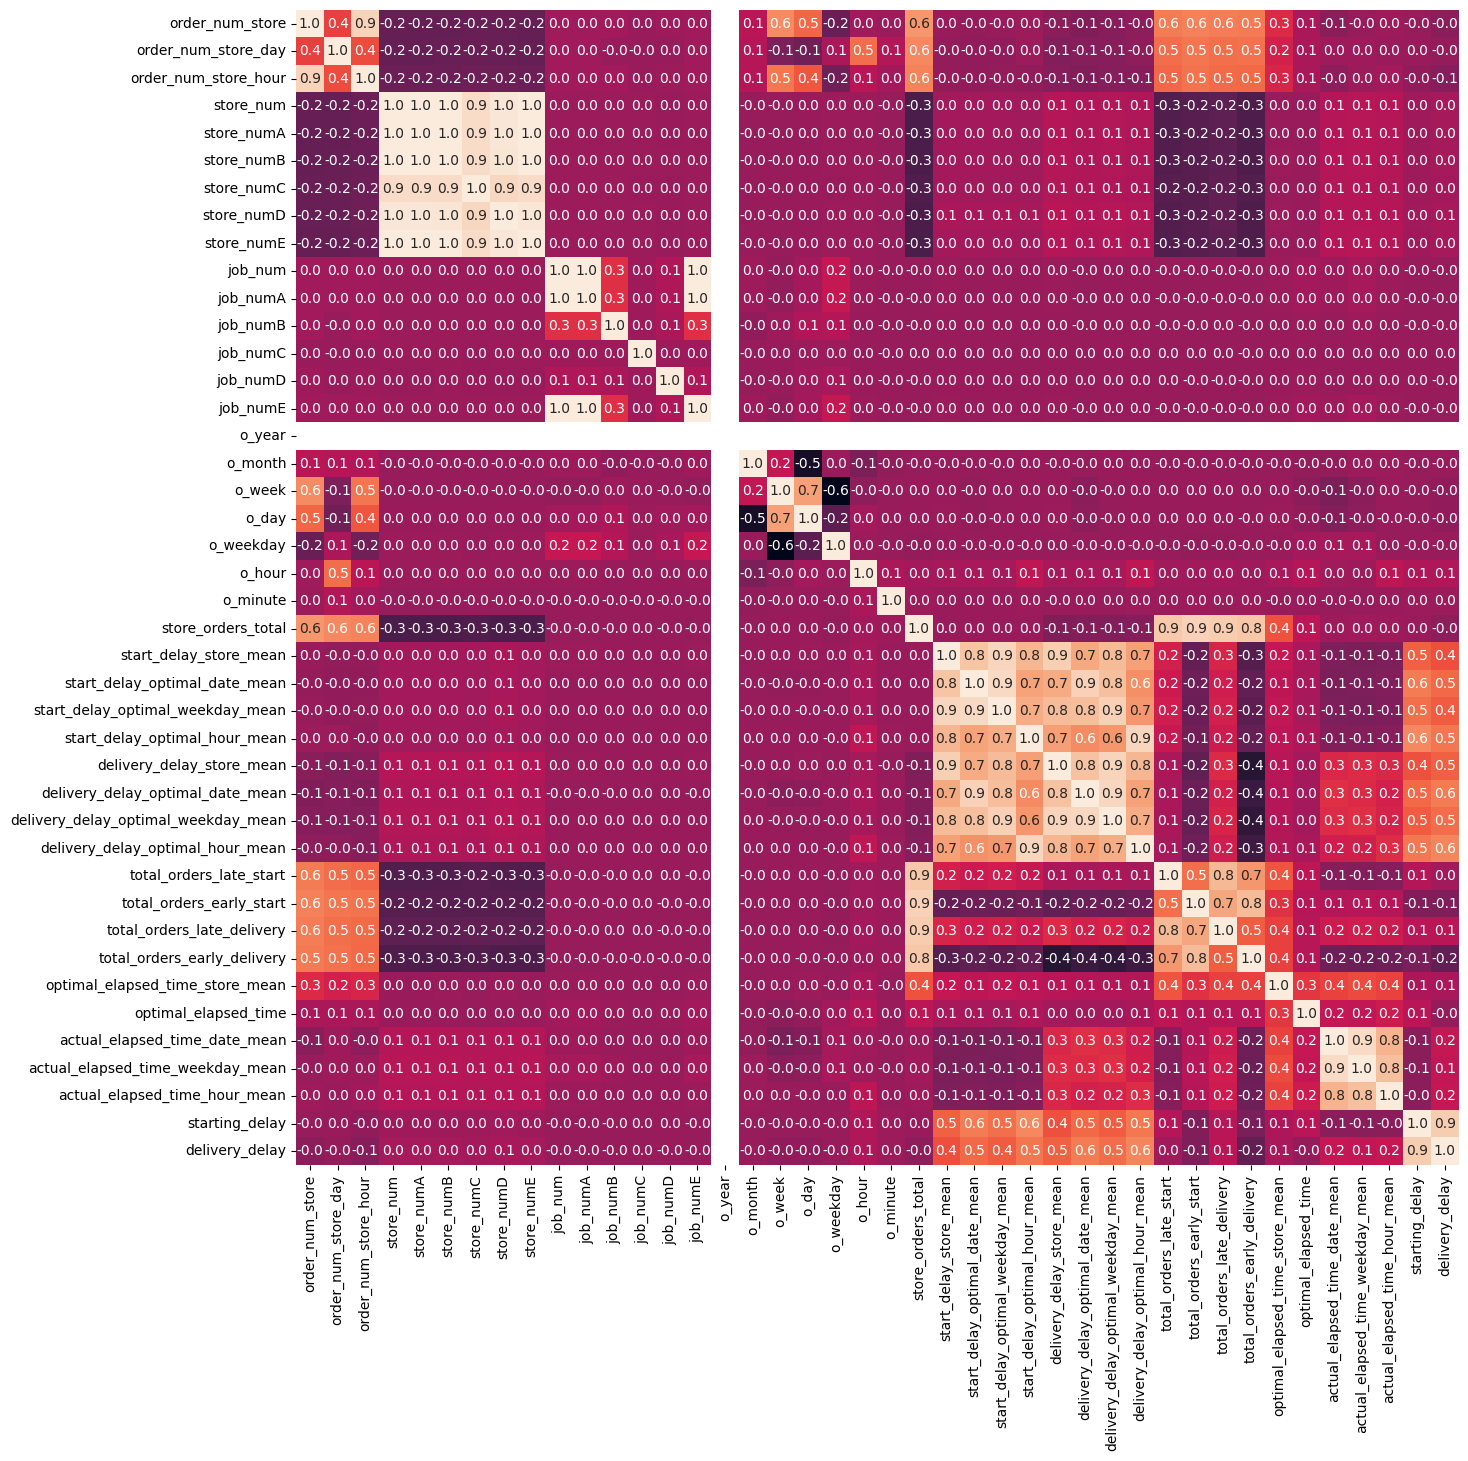

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
sns.heatmap(df_final.corr(), cbar = False, annot = True, fmt=".1f")

<Axes: >

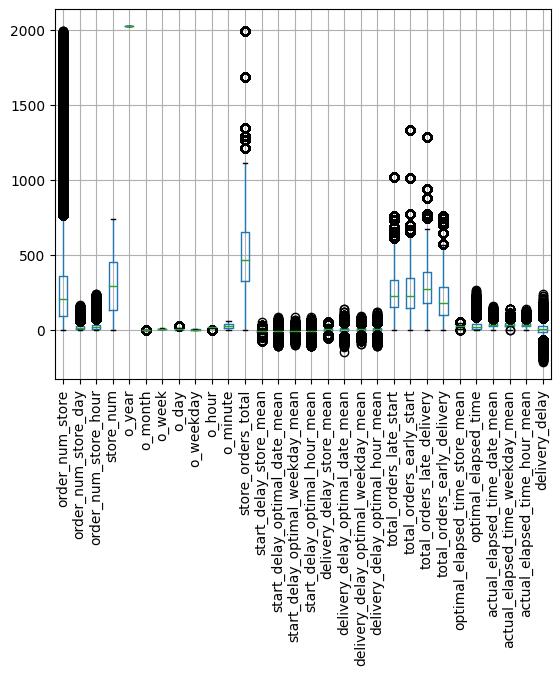

In [ ]:
df_final.boxplot(rot=90)

<Axes: >

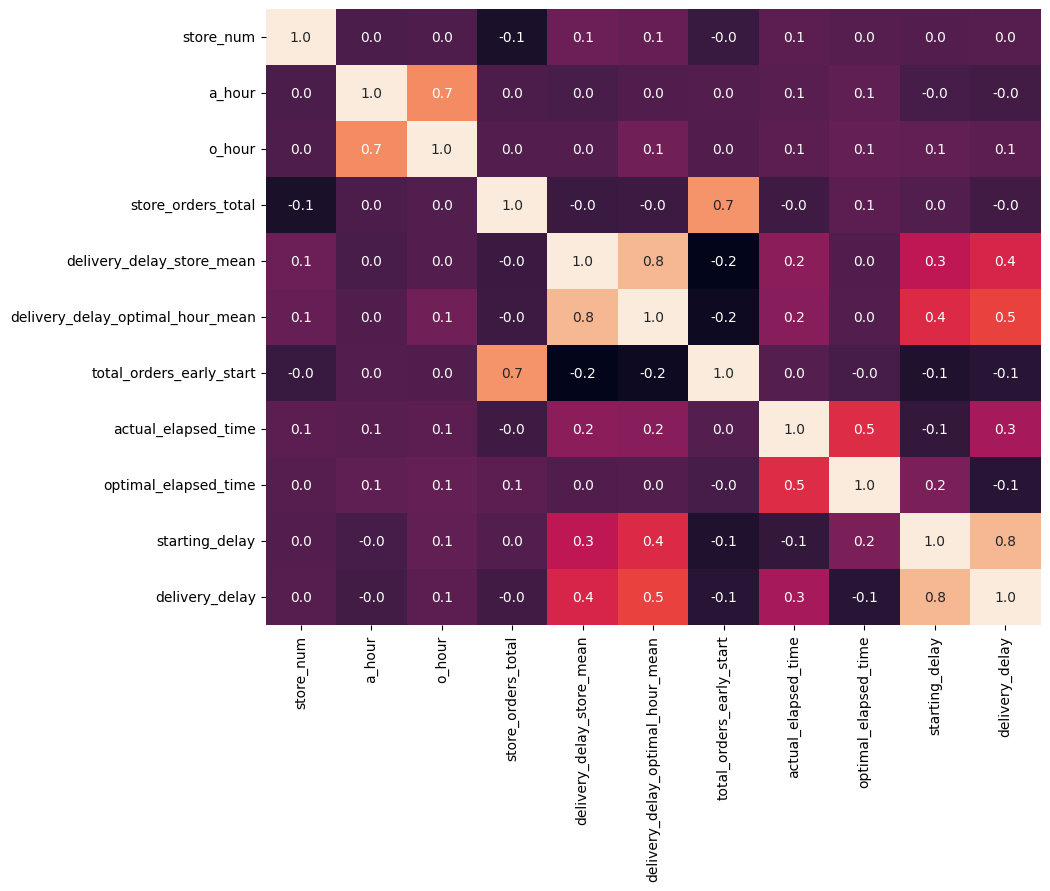

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.heatmap(df_final.corr(), cbar = False, annot = True, fmt=".1f")

In [ ]:
## Split train an test

print(len(df_final))

stores = df_final.store_num.unique()
train_set=pd.DataFrame()
val=0

for store in stores:
  train = df_final[df_final['store_num']==store].sample(frac=0.7, random_state=42)
  train_set=pd.concat([train_set, train])
  val+=1
  print(val)

test_set = df_final.drop(train_set.index)
print(train_set.shape, test_set.shape)

y_train = train_set['delivery_delay']
x_train = train_set.drop(['delivery_delay'], axis=1)

y_test = test_set['delivery_delay']
x_test = test_set.drop(['delivery_delay'], axis=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

268384
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

MSE : 695.6595386704022
RMSE : 26.375358550556278
RMPSE : -13.636141478855198
R2 : 0.8455410884185013
[0.01674834 0.00359916 0.00425896 0.03244434 0.         0.0020135
 0.0051803  0.00422189 0.         0.00312211 0.00251517 0.00243373
 0.00206191 0.00309995 0.         0.         0.00324015 0.00406006
 0.03241783 0.01083823 0.00591269 0.01066916 0.0195486  0.0220006
 0.0070664  0.01514407 0.00560116 0.00564034 0.04012379 0.00526616
 0.03299845 0.00366373 0.00633409 0.0028549  0.00529324 0.09059967
 0.02360885 0.05722331 0.00301332 0.03533621 0.46984562]


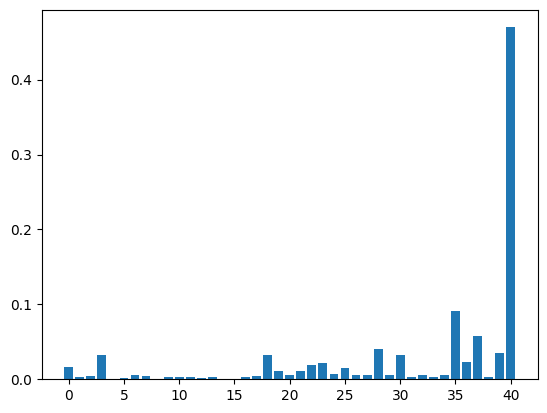

,actual,pred
0,-1.798383,8.907499
1,1.908583,4.871619
2,-124.705750,-135.392212
3,-0.886933,0.317148
4,-30.242883,-5.004496
...,...,...
80518,45.481083,37.365726
80519,40.182550,51.091080
80520,-58.757217,-29.247297
80521,19.341300,-18.286003


pos: 0 = order_num_store
pos: 1 = order_num_store_day
pos: 2 = order_num_store_hour
pos: 3 = store_num
pos: 4 = store_numA
pos: 5 = store_numB
pos: 6 = store_numC
pos: 7 = store_numD
pos: 8 = store_numE
pos: 9 = job_num
pos: 10 = job_numA
pos: 11 = job_numB
pos: 12 = job_numC
pos: 13 = job_numD
pos: 14 = job_numE
pos: 15 = o_year
pos: 16 = o_month
pos: 17 = o_week
pos: 18 = o_day
pos: 19 = o_weekday
pos: 20 = o_hour
pos: 21 = o_minute
pos: 22 = store_orders_total
pos: 23 = start_delay_store_mean
pos: 24 = start_delay_optimal_date_mean
pos: 25 = start_delay_optimal_weekday_mean
pos: 26 = start_delay_optimal_hour_mean
pos: 27 = delivery_delay_store_mean
pos: 28 = delivery_delay_optimal_date_mean
pos: 29 = delivery_delay_optimal_weekday_mean
pos: 30 = delivery_delay_optimal_hour_mean
pos: 31 = total_orders_late_start
pos: 32 = total_orders_early_start
pos: 33 = total_orders_late_delivery
pos: 34 = total_orders_early_delivery
pos: 35 = optimal_elapsed_time_store_mean
pos: 36 = optimal_elap

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
import math
from sklearn.metrics import r2_score

#xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost = xgb.XGBRegressor()
xgboost.fit(x_train, y_train)
y_pred_xgb = xgboost.predict(x_test)

MSE = mse(y_test, y_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

delay_mean = np.mean(y_test)
RMPSE = RMSE/delay_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, y_pred_xgb)
print("R2 :", r2)

print(xgboost.feature_importances_)
# plot
plt.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
plt.show()

display(pd.DataFrame(zip(y_test, y_pred_xgb), columns = ['actual', 'pred']))

val=0
for i in x_train.columns:
  print(f'pos: {val} = {i}')
  val+=1

In [ ]:
'''df_final2 = df_new3[['store_num', 'o_hour', 'store_orders_total',
                    'delivery_delay_store_mean', 'delivery_delay_optimal_hour_mean',
                    'total_orders_early_start','optimal_elapsed_time', 'actual_elapsed_time_store_mean',
                    'starting_delay', 'delivery_delay']]'''

''' store_num --> store
    store_orders_total -- Total order by stores -- in production replace by (promedio de ordenes totales de los ultimos x dias)
    delivery_delay_store_mean -- promedio de tiempo de retraso de delivery para esa store -- in production replace by (promedio de los ultimos x dias)
    delivery_delay_optimal_hour_mean -- promedio de tiempo de retraso de delivery a esa hora del dia para todos los dias -- in production replace by (promedio de retraso de delivery a esa hora del dia de los ultimos x dias)
    total_orders_early_start -- Total order with negative value in start. i.e without delay by store (promedio de ordenes sin retraso totales de los ultimos x dias)
    optimal_elapsed_time  --- optimal elapse time offer as input by each store
    actual_elapsed_time_store_mean  --- mean actual_elapsed_time by store
    'starting_delay', 'delivery_delay'''



#df_aux =  df_new3.loc[df_new3['store_id']=='03bc9864-b320-4a59-b556-f9f96c06d99c'].reset_index(drop=True)
df_final2 = df_new3[['store_num', 'o_year', 'o_month', 'o_week', 'o_day', 'o_weekday', 'o_hour', 'o_minute',
                    'orders_date_optimal', 'orders_hour_optimal', 'store_orders_total',
                    'start_delay_store_mean', 'start_delay_optimal_date_mean',
                    'start_delay_optimal_weekday_mean', 'start_delay_optimal_hour_mean',
                    'delivery_delay_store_mean', 'delivery_delay_optimal_date_mean',
                    'delivery_delay_optimal_weekday_mean', 'delivery_delay_optimal_hour_mean',
                    'total_orders_late_start', 'total_orders_early_start', 'total_orders_late_delivery', 'total_orders_early_delivery',
                    'actual_elapsed_time_store_mean', 'optimal_elapsed_time_store_mean',
                    'optimal_elapsed_time', 'starting_delay', 'delivery_delay']]


display(df_final2.head(5))
print(df_final2.dtypes)

display(df_final2.describe())

,store_num,o_year,o_month,o_week,o_day,o_weekday,o_hour,o_minute,orders_date_optimal,orders_hour_optimal,...,delivery_delay_optimal_hour_mean,total_orders_late_start,total_orders_early_start,total_orders_late_delivery,total_orders_early_delivery,actual_elapsed_time_store_mean,optimal_elapsed_time_store_mean,optimal_elapsed_time,starting_delay,delivery_delay
0,0,2024,3,10,4,0,23,29,51,5,...,26.977923,169,332,393,108,72.856545,38.910180,39.0,-4.419133,186.731600
1,1,2024,3,10,5,1,0,42,53,2,...,8.550722,267,555,386,436,26.322711,21.512165,3.0,-4.919950,12.860133
2,2,2024,3,10,5,1,1,23,29,1,...,7.299338,231,308,288,251,31.696856,26.855288,3.0,0.596417,-0.966083
3,1,2024,3,10,5,1,15,36,53,3,...,-11.592726,267,555,386,436,26.322711,21.512165,13.0,0.644917,-1.798383
4,3,2024,3,10,5,1,20,57,115,19,...,-106.684458,131,773,289,615,31.378498,10.057522,4.0,-127.896783,-131.104650


store_num                                int64
o_year                                   int64
o_month                                  int64
o_week                                   int64
o_day                                    int64
o_weekday                                int64
o_hour                                   int64
o_minute                                 int64
orders_date_optimal                      int64
orders_hour_optimal                      int64
store_orders_total                       int64
start_delay_store_mean                 float64
start_delay_optimal_date_mean          float64
start_delay_optimal_weekday_mean       float64
start_delay_optimal_hour_mean          float64
delivery_delay_store_mean              float64
delivery_delay_optimal_date_mean       float64
delivery_delay_optimal_weekday_mean    float64
delivery_delay_optimal_hour_mean       float64
total_orders_late_start                  int64
total_orders_early_start                 int64
total_orders_

,store_num,o_year,o_month,o_week,o_day,o_weekday,o_hour,o_minute,orders_date_optimal,orders_hour_optimal,...,delivery_delay_optimal_hour_mean,total_orders_late_start,total_orders_early_start,total_orders_late_delivery,total_orders_early_delivery,actual_elapsed_time_store_mean,optimal_elapsed_time_store_mean,optimal_elapsed_time,starting_delay,delivery_delay
count,132405.000000,132405.0,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,...,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000,132405.000000
mean,89.538462,2024.0,2.987297,9.977546,7.332820,3.121597,17.182750,27.923130,57.307526,6.273713,...,-6.085484,367.325735,417.251546,422.037884,362.539398,39.204201,29.667513,29.667513,-15.622173,-6.085484
std,52.842602,0.0,0.111992,0.708389,4.665062,2.024711,5.208412,18.116328,23.455946,4.071653,...,36.564961,171.015653,184.001270,189.924987,174.579189,12.706691,7.101153,27.447606,64.967147,65.617004
min,0.000000,2024.0,2.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,-655.913650,0.000000,80.000000,101.000000,55.000000,14.115660,5.504274,1.000000,-1103.982967,-1049.723167
25%,44.000000,2024.0,3.000000,9.000000,4.000000,1.000000,16.000000,12.000000,41.000000,4.000000,...,-19.548697,255.000000,299.000000,292.000000,228.000000,30.497453,25.338462,8.000000,-22.379117,-22.717783
50%,89.000000,2024.0,3.000000,10.000000,7.000000,3.000000,18.000000,28.000000,53.000000,5.000000,...,0.221510,346.000000,381.000000,386.000000,335.000000,37.957452,30.541899,23.000000,-3.398583,2.771717
75%,133.000000,2024.0,3.000000,10.000000,11.000000,5.000000,21.000000,43.000000,68.000000,8.000000,...,12.638177,437.000000,506.000000,511.000000,459.000000,44.801082,34.131737,42.000000,5.962283,25.664217
max,184.000000,2024.0,3.000000,11.000000,29.000000,6.000000,23.000000,59.000000,153.000000,70.000000,...,99.453150,1068.000000,1242.000000,1205.000000,862.000000,88.167978,48.786000,282.000000,332.595100,508.899717


In [ ]:
## Split train an test

print(len(df_final2))

stores = df_final2.store_num.unique()
train_set=pd.DataFrame()
#val=0

for store in stores:
  train = df_final2[df_final2['store_num']==store].sample(frac=0.7, random_state=42)
  train_set=pd.concat([train_set, train])
  #val+=1
  #print(val)

test_set = df_final2.drop(train_set.index)
print(train_set.shape, test_set.shape)

y_train2 = train_set[['starting_delay', 'delivery_delay']]
x_train2 = train_set.drop(['starting_delay', 'delivery_delay'], axis=1)

y_test2 = test_set[['starting_delay', 'delivery_delay']]
x_test2 = test_set.drop(['starting_delay', 'delivery_delay'], axis=1)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

132405
(92677, 28) (39728, 28)
(92677, 26)
(39728, 26)
(92677, 2)
(39728, 2)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Y1_pred = y_pred[:,0],
      Y2_pred = y_pred[:,1]
  ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train2,y_train2)
showResults(y_test2,linear.predict(x_test2))

R2 score:  0.3910291597472029
Mean squared error:  2616.7658132336574
Mean absolute error:  33.53772879581152
Predictions: 
|   starting_delay |   delivery_delay |    Y1_pred |    Y2_pred |
|-----------------:|-----------------:|-----------:|-----------:|
|         0.644917 |         -1.79838 |   -6.28125 |   -4.40625 |
|      -136.409    |       -124.706   | -120.125   | -104.969   |
|       -26.2161   |        -30.2429  |  -46       |  -25.875   |
|        27.8184   |         70.7127  |  -96.8438  |  -56.2188  |
|       -18.6891   |        -21.9434  |  -22.625   |   -1.40625 |


MSE : 325.09437816136386
RMSE : 18.03037376654638
RMPSE : -4.796183295961807
R2 : -0.054008189641385096
[0.         0.         0.00651755 0.03864413 0.06275856 0.05664488
 0.06599496 0.09569027 0.10295424 0.0741131  0.         0.
 0.06817361 0.04528032 0.12453665 0.         0.07180963 0.06003371
 0.06272084 0.         0.         0.         0.         0.
 0.         0.06412758]


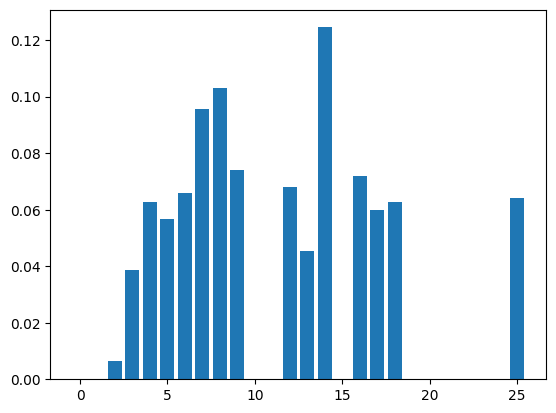

,actual,pred
0,0.172117,-11.482388
1,20.171350,9.858626
2,2.668883,9.987656
3,-7.331983,6.167718
4,-24.050183,-16.824745
...,...,...
361,-7.699283,-6.734158
362,-31.867217,0.523580
363,-30.496567,14.836898
364,-56.703033,3.028207


pos: 0 = store_num
pos: 1 = o_year
pos: 2 = o_month
pos: 3 = o_week
pos: 4 = o_day
pos: 5 = o_weekday
pos: 6 = o_hour
pos: 7 = o_minute
pos: 8 = orders_date_optimal
pos: 9 = orders_hour_optimal
pos: 10 = store_orders_total
pos: 11 = start_delay_store_mean
pos: 12 = start_delay_optimal_date_mean
pos: 13 = start_delay_optimal_weekday_mean
pos: 14 = start_delay_optimal_hour_mean
pos: 15 = delivery_delay_store_mean
pos: 16 = delivery_delay_optimal_date_mean
pos: 17 = delivery_delay_optimal_weekday_mean
pos: 18 = delivery_delay_optimal_hour_mean
pos: 19 = total_orders_late_start
pos: 20 = total_orders_early_start
pos: 21 = total_orders_late_delivery
pos: 22 = total_orders_early_delivery
pos: 23 = actual_elapsed_time_store_mean
pos: 24 = optimal_elapsed_time_store_mean
pos: 25 = optimal_elapsed_time


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
import math
from sklearn.metrics import r2_score

#xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost = xgb.XGBRegressor()
xgboost.fit(x_train2, y_train2)
y_pred_xgb2 = xgboost.predict(x_test2)

MSE = mse(y_test2, y_pred_xgb2)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

delay_mean = np.mean(y_test2)
RMPSE = RMSE/delay_mean
print("RMPSE :", RMPSE)

r2 = r2_score(y_test2, y_pred_xgb2)
print("R2 :", r2)

print(xgboost.feature_importances_)
# plot
plt.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
plt.show()

display(pd.DataFrame(zip(y_test2, y_pred_xgb2), columns = ['actual', 'pred']))

val=0
for i in x_train2.columns:
  print(f'pos: {val} = {i}')
  val+=1